In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle
import yaml
import dcargs
import pandas as pd

import seaborn as sns

sys.path.append("..") 

from experiment import ExperimentParameters
import glob
from tqdm import tqdm
from yaml.loader import SafeLoader

from importlib import reload

import postpro_centrality_certainty as postpro
reload(postpro)

# path = "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/"
path = "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/N100_2023-08-18-17-16-12_network_search_Naive_centralized_random_fixed_mdeg/results/"
sys.path.append(path)


In [2]:
from multiprocessing import Pool

def parse_experiments(base_file_path):
    pathes = glob.glob(os.path.join(base_file_path, "*"))
    pool = Pool(10)
    dataframes = pool.imap(postpro.post_pro_network_centrality_certainty, tqdm(pathes))
    return pd.concat(dataframes, ignore_index=True)

In [3]:
df = parse_experiments(path)
df.to_pickle(path[:-8] + "df.pkl")

 90%|█████████ | 90429/100001 [3:04:25<19:09,  8.33it/s]  

[Errno 20] Not a directory: '/home/mohsen/Project/colab/collective-decison-making-with-direl/results/N100_2023-08-18-17-16-12_network_search_Naive_centralized_random_fixed_mdeg/results/df.pkl/data.pickle5'
Something Went Wrong!


100%|██████████| 100001/100001 [3:24:00<00:00,  8.17it/s]


In [4]:
path[:-8]

'/home/mohsen/Project/colab/collective-decison-making-with-direl/results/N100_2023-08-18-17-16-12_network_search_Naive_centralized_random_fixed_mdeg/'

In [2]:
# df = pd.read_pickle(path + "df.pkl")
df = pd.read_pickle(path[:-8] + "df.pkl")

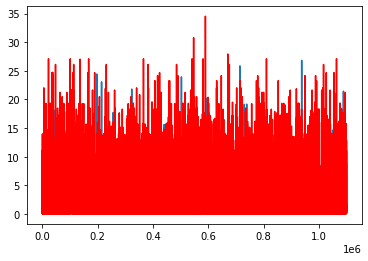

In [29]:
# print(df)
# plt.plot(df.sign_dot_prod_avg)
# plt.plot(df.sign_dot_prod_central,'r')



plt.plot(df.diff_z_tf_avg)
plt.plot(df.diff_z_tf_central_node,'r')

In [ ]:


# plot jitter with swarmplot for both central node and average on same plot
sns.swarmplot(data=df[['diff_z_tf_central_node','diff_z_tf_avg']])

# sns.swarmplot(data=df[['sign_dot_prod_central','sign_dot_prod_avg']])




<AxesSubplot: >

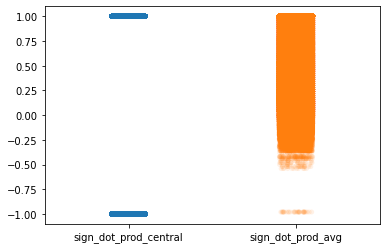

In [6]:
# sns.stripplot(data=df[['diff_z_tf_central_node','diff_z_tf_avg']],alpha=0.1)
sns.stripplot(data=df[['sign_dot_prod_central','sign_dot_prod_avg']],alpha=0.1)

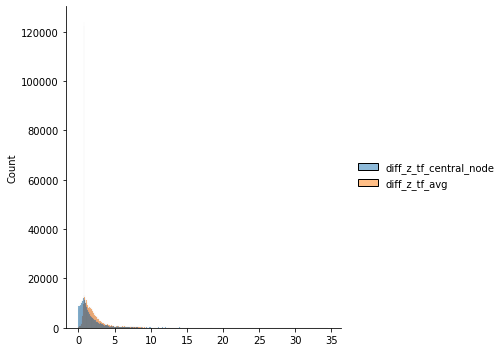

In [7]:
sns.displot(data=df[['diff_z_tf_central_node','diff_z_tf_avg']])
# sns.displot(data=df[['sign_dot_prod_central','sign_dot_prod_avg']])

In [28]:
# sns.stripplot(df['sign_dot_prod_central']-df['sign_dot_prod_avg'])

df['diff_diff'] = df['diff_z_tf_central_node']-df['diff_z_tf_avg']
df['diff_sign_dot_prod'] = df['sign_dot_prod_central']-df['sign_dot_prod_avg']


# sns.stripplot(data= df, x="diff_diff",hue='Netw_std_eigVec')

/tmp/ipykernel_2327101/1815221235.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.2f}'.format(x) for x in ax.get_xticks()]);


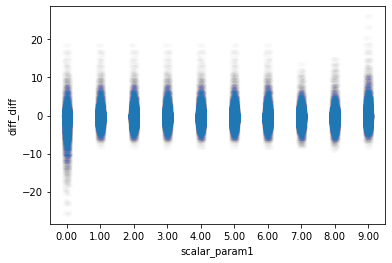

In [47]:
# sns.scatterplot(data= df, y="diff_diff",x='Netw_std_eigVec',alpha=0.005)
# sns.scatterplot(data= df, y="diff_diff",x='Netw_std_eigVal',alpha=0.005)
# ax = sns.stripplot(data= df, y="diff_diff",x='weight_own_belief',alpha=0.005,hue='scalar_param1', hue_norm=(0, 0.3))
ax = sns.stripplot(data= df, y="diff_diff",x='scalar_param1',alpha=0.005)
# sns.boxplot(data= df, y="diff_diff",x='weight_own_belief')

# change the format of xlabels to be not more than 2 decimal points
ax.set_xticklabels(['{:.2f}'.format(x) for x in ax.get_xticks()]);

In [42]:
df.weight_own_belief.unique()

array([0.44444444, 0.88888889, 0.77777778, 0.66666667, 0.33333333,
       1.        , 0.11111111, 0.22222222, 0.        , 0.55555556])

In [33]:
# make the average of the diff_diff for specific weight_own_belief=0.5
w_o_b_uniq = df['weight_own_belief'].unique()
w_o_b_uniq.sort()
print(w_o_b_uniq)
df[df['weight_own_belief']==w_o_b_uniq[6]]['diff_sign_dot_prod'].mean()

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


0.16489199999999998

<AxesSubplot: xlabel='diff_diff', ylabel='scalar_param1'>

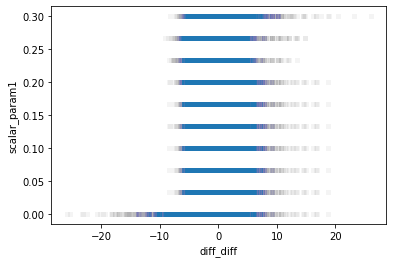

In [13]:
sns.scatterplot(data= df, x="diff_diff",y='scalar_param1',alpha=0.005)
# sns.scatterplot(data= df, x="scalar_param1", y='Netw_std_degree', alpha=0.005)

In [8]:
# plot a heatmap of the diff diff for the x-axis of weight_own_belief and y-axis of scalar_param1
sns.heatmap(df.pivot('scalar_param1','weight_own_belief','diff_diff'))

/tmp/ipykernel_2327101/3963577703.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df.pivot('scalar_param1','weight_own_belief','diff_diff'))


ValueError: Index contains duplicate entries, cannot reshape

In [29]:
x = np.array([np.ones(99),99]);
# print(x)
x.std()

/tmp/ipykernel_1988581/1937856282.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array([np.ones(99),99]);


AxisError: axis 1 is out of bounds for array of dimension 1

In [8]:
# np.mean(df['sign_dot_prod_central']-df['sign_dot_prod_avg'])
np.mean(df['diff_z_tf_central_node']-df['diff_z_tf_avg'])


-0.27788513051284514